In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import matplotlib

matplotlib.style.use("ggplot")
from ipywidgets import interact
import numpy as np
import matplotlib as mpl
import arrow
from matplotlib import animation, rc
from IPython.display import HTML, display
from datetime import timedelta


%matplotlib inline

In [18]:
#############################################################################
# Prepare data and import into a dataframe
#############################################################################


# Export Data from healthkit using [qs-access](https://itunes.apple.com/us/app/qs-access/id920297614?mt=8) app
exported_and_trandformed_csv_file = "data/sleep.csv"
df = pd.read_csv(exported_and_trandformed_csv_file)


def toDecimal(dt):
    return dt.hour + round(dt.minute / 60, 2)


# make dateColumn a datetime.
df["bedtime"] = pd.to_datetime(df["In bed at"])
df["waketime"] = pd.to_datetime(df["Until"])
df["dbedtime"] = df.bedtime.apply(toDecimal)
df["dwaketime"] = df.waketime.apply(toDecimal)
df["dasleep"] = pd.to_datetime(df.Asleep).apply(toDecimal)
# df["dquality"] = pd.to_datetime(df["Quality sleep"]).apply(toDecimal)
# df["ddeep"] = pd.to_datetime(df["Deep sleep"]).apply(toDecimal)
df["dduration"] = pd.to_datetime(df["Duration"]).apply(toDecimal)
df.drop("Until", inplace=True, axis=1)
df.drop("In bed at", inplace=True, axis=1)
idx_date = "idate"

# https://stackoverflow.com/questions/16176996/keep-only-date-part-when-using-pandas-to-datetime
df[idx_date] = pd.to_datetime(df.waketime).dt.normalize()

df = df.set_index(df[idx_date])
df.sort_index(inplace=True)
# Create Time Period Groups
idx_month_year = "month_year"
df[idx_month_year] = df.index.to_series().apply(lambda t: arrow.get(t).format("MMM-YY"))

idx_week_year = "week_year"
df[idx_week_year] = df.index.to_series().apply(lambda t: f"{t.week}-{t.year-2000}")

#########################
# Clean data
###########################

# Remove 0 weight values.
df = df.replace(0, np.nan)
# Throw away junk data at the start of time
df = df["2010/1/1":]  # type: ignore

# Throw away any weights less then 100
# Remove any rows with 0 values

cNoHeartRate = df[df.Heartrate == "--"].Duration.count()
print(f"Dropping {cNoHeartRate} w/o heart rate and other rich data ")
df = df[df.Heartrate != "--"]
df.Heartrate = pd.to_numeric(df.Heartrate)

# Helpful time aliases
df_alltime = df
df

Dropping 24 w/o heart rate and other rich data 


,Duration,Asleep,Time awake in bed,Fell asleep in,Quality sleep,Deep sleep,Heartrate,Tags,Notes,bedtime,waketime,dbedtime,dwaketime,dasleep,dduration,idate,month_year,week_year
idate,,,,,,,,,,,,,,,,,,
2018-09-03,7:39,7:14,25,--,5:21,2:29,57,--,--,2018-09-02 21:50:00,2018-09-03 05:29:00,21.83,5.48,7.23,7.65,2018-09-03,Sep-18,36-18
2018-09-09,6:49,6:09,40,--,4:19,1:28,54,--,--,2018-09-08 21:54:00,2018-09-09 04:43:00,21.90,4.72,6.15,6.82,2018-09-09,Sep-18,36-18
2018-09-10,7:28,6:42,46,12,5:26,1:29,55,--,--,2018-09-09 21:32:41,2018-09-10 05:01:00,21.53,5.02,6.70,7.47,2018-09-10,Sep-18,37-18
2018-09-11,7:57,7:37,20,--,5:21,1:46,62,--,--,2018-09-10 21:41:00,2018-09-11 05:38:00,21.68,5.63,7.62,7.95,2018-09-11,Sep-18,37-18
2018-09-12,8:26,7:40,46,--,5:12,43,55,--,--,2018-09-11 21:02:00,2018-09-12 05:28:00,21.03,5.47,7.67,8.43,2018-09-12,Sep-18,37-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-19,9:49,9:23,26,--,6:03,1:16,59,--,--,2020-11-18 20:00:00,2020-11-19 04:51:00,20.00,4.85,9.38,9.82,2020-11-19,Nov-20,47-20
2020-11-20,6:36,6:36,0,--,4:46,45,59,--,--,2020-11-19 21:16:00,2020-11-20 03:52:00,21.27,3.87,6.60,6.60,2020-11-20,Nov-20,47-20
2020-11-21,10:53,9:22,1:31,--,6:23,1:36,61,--,--,2020-11-20 18:31:00,2020-11-21 05:24:00,18.52,5.40,9.37,10.88,2020-11-21,Nov-20,47-20


In [13]:
# OMG - SO SAD - box plot sorting is broken in - vega:
# https://github.com/vega/vega-lite/issues/4932

# GRR - Need to go back to matplotlib
def box_plot_metric(df, x, fact, title, domain):
    # In theory can use plot.ly (not free)  or Bokeh (not mpl compatible) but issues. So setting dimensions old school.
    # Manually setting the weight and width.
    height_in_inches = 8
    mpl.rc("figure", figsize=(2 * height_in_inches, height_in_inches))

    ax = sns.boxplot(x=x, y=fact, data=df)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(title)
    ax.set_xlabel("date")
    ax.set_ylabel(fact)
    ax.set_ylim(domain[0], domain[1])
    plt.show()


def box_plot_metric_vegas_broken_sort_order(df, x, fact, title, domain):
    height_in_inches = 4 * 60  # todo figure out how to get this by calculation
    c = (
        alt.Chart(df)
        .mark_boxplot()
        .encode(y=alt.Y(fact, scale=alt.Scale(domain=domain, clamp=True)), x=x)
        .properties(width=4 * height_in_inches, height=height_in_inches, title=title)
        .interactive()
    )
    display(c)

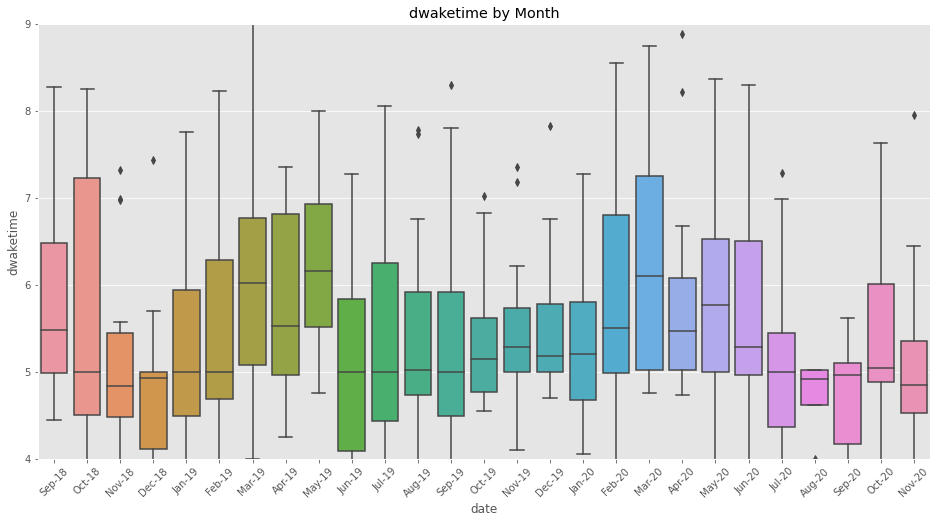

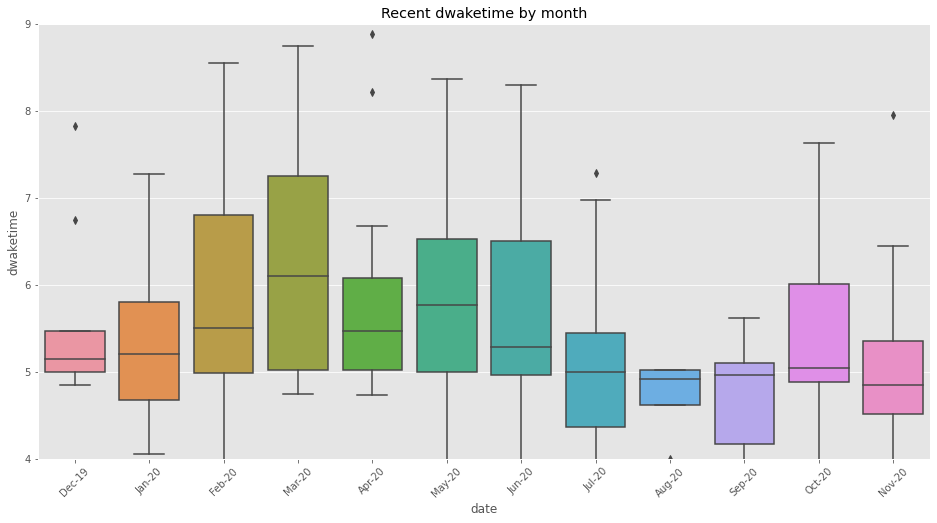

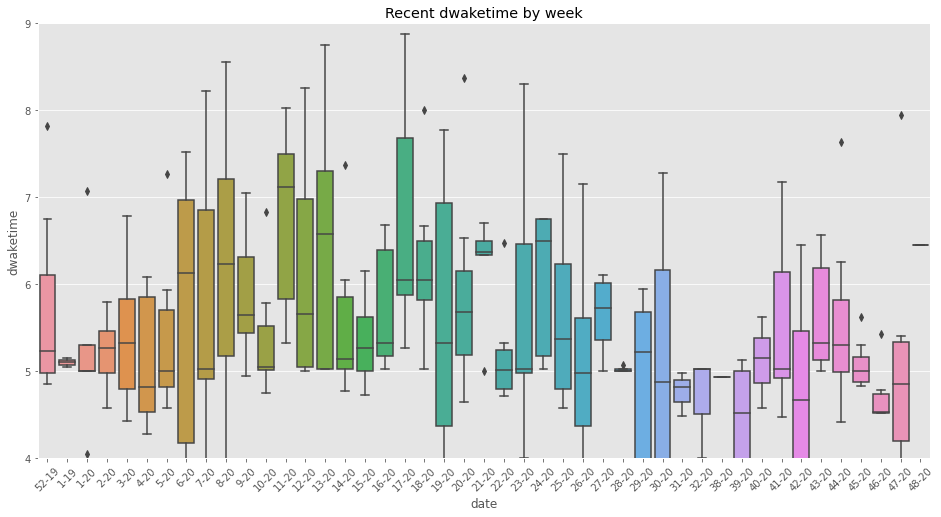

In [14]:
earliest = arrow.utcnow().shift(months=-12).date()
# fact, domain = "dbedtime", (18, 25)
fact, domain = "dwaketime", (4, 9)
# fact,domain = "Heartrate", (50,80)


box_plot_metric(df_alltime, idx_month_year, fact, f"{fact} by Month", domain=domain)

box_plot_metric(
    df[earliest:], idx_month_year, fact, title=f"Recent {fact} by month", domain=domain
)
box_plot_metric(
    df[earliest:], idx_week_year, fact, title=f"Recent {fact} by week", domain=domain
)

# Time Series Analysis using resampling

In [15]:
# fact,domain = "dbedtime", (19,24)
# fact,domain = "dwaketime", (4,9)
fact, domain = "Heartrate", (50, 80)
summary_quantile = 0.5  # 0.5 for median

print("Scroll to see year markers, select in index to zoom in")

for freq in "Month Week".split():
    pd_freq_value = freq[0]  # hack, pandas Freq are D,W,M
    metric = "dbedtime;dwaketime;dduration".split(";")
    to_graph = df.copy()[metric].resample(pd_freq_value)
    to_graph = to_graph.quantile(summary_quantile).reset_index()

    # Convert from PM to AM.
    # Assume if bed time is before 12, it's wrapped to the next day. Clamp it ot midnight
    to_graph.dbedtime = to_graph.dbedtime.apply(lambda x: x - 12 if x > 12 else 11.59)

    # At this point each metric is in its own column
    # melt them into a single 'variable' column so I can use a variable value by color.

    melted = to_graph.melt(
        id_vars=["idate"],
    )
    height_in_inches = 60  # todo figure out how to get this by calculation
    selection = alt.selection_multi(fields=["variable"], bind="legend")
    c = (
        alt.Chart(melted)
        .mark_line(point=True)
        .encode(
            y=alt.Y("value", title="", scale=alt.Scale()),
            x="idate:T",
            color="variable",
            tooltip=["idate:T", "value:Q"],
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
        )
        .properties(
            width=16 * height_in_inches,
            height=4 * height_in_inches,
            title=f"Sleep stats by {freq} @P{summary_quantile*100}",
        )
        .interactive()
    ).add_selection(selection)

    display(c)

Scroll to see year markers, select in index to zoom in


alt.Chart(...)

alt.Chart(...)

In [17]:
metric, domain = "Heartrate", (50, 80)

print("Scroll to see year markers, select in index to zoom in")

for freq in "Month Week".split():
    pd_freq_value = freq[0]  # hack, pandas Freq are D,W,M
    df_group_time = df.copy()[metric].resample(pd_freq_value)
    t1 = df_group_time.count().reset_index()
    # Create the root df for output
    df_to_graph = t1.drop(columns=metric)
    for q in [0.25, 0.5, 0.75, 0.9]:
        df_to_graph[f"p{q*100}"] = df_group_time.quantile(q).reset_index()[metric]

    # No start adding back the rows
    df_melted = df_to_graph.melt(
        id_vars=["idate"],
    )
    height_in_inches = 60  # todo figure out how to get this by calculation
    selection = alt.selection_multi(fields=["variable"], bind="legend")
    c = (
        alt.Chart(df_melted)
        .mark_line(point=True)
        .encode(
            y=alt.Y("value", title="", scale=alt.Scale(domain=domain)),
            x="idate:T",
            color="variable",
            tooltip=["idate:T", "value:Q"],
            opacity=alt.condition(selection, alt.value(1), alt.value(0.2)),
        )
        .properties(
            width=16 * height_in_inches,
            height=6 * height_in_inches,
            title=f"{metric} By {freq}",
        )
        .interactive()
    ).add_selection(selection)

    display(c)

Scroll to see year markers, select in index to zoom in


alt.Chart(...)

alt.Chart(...)